In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import squidpy as sq

In [2]:
adata = sc.read_10x_h5(
    filename="ZB4171/Xenium_V1_FFPE_TgCRND8_5_7_months_outs/cell_feature_matrix.h5"
)

In [3]:
adata

AnnData object with n_obs × n_vars = 58682 × 347
    var: 'gene_ids', 'feature_types', 'genome'

In [4]:
df = pd.read_csv(
    "ZB4171/Xenium_V1_FFPE_TgCRND8_5_7_months_outs/cells.csv.gz", compression="gzip"
)

In [5]:
df

cell_id   x_centroid   y_centroid  transcript_counts  \
0      aaabaohn-1   844.394379   870.383969                181   
1      aaabocno-1   830.434280   771.295468                294   
2      aaadpgin-1   851.595981   706.267719                155   
3      aaaecjii-1   828.756277   852.021915                282   
4      aaaegkaj-1   835.794717   637.692163                166   
...           ...          ...          ...                ...   
58677  oijlpmjb-1  2604.292505  4258.035986                296   
58678  oijmjakb-1  2609.102600  4359.098413                151   
58679  oikbcigb-1  2613.306946  4337.908594                254   
58680  oikbfpkg-1  2619.249890  4364.785693                133   
58681  oikcmgab-1  2623.078833  4383.219653                 96   

       control_probe_counts  control_codeword_counts  \
0                         0                        0   
1                         0                        0   
2                         0                        0   
3                         0                        0   
4                         0                        0   
...                     ...                      ...   
58677                     0                        0   
58678                     0                        0   
58679                     0                        0   
58680                     0                        0   
58681                     0                        0   

       unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
0                               0           181  279.020469     46.240000  
1                               0           294  565.401406     26.642187  
2                               0           155  351.405937     18.694688  
3                               0           282  528.553906     68.502031  
4                               0           166  109.820000     42.266250  
...                           ...           ...         ...           ...  
58677                           0           296  715.997500     22.532969  
58678                           0           151  267.054062     22.442656  
58679                           0           254  620.762969     15.353125  
58680                           0           133  254.681250     32.015781  
58681                           0            96  395.523594     17.972188  

[58682 rows x 10 columns]

In [6]:
df.set_index(adata.obs_names, inplace=True)
adata.obs = df.copy()

In [7]:
adata.obsm["spatial"] = adata.obs[["x_centroid", "y_centroid"]].copy().to_numpy()

In [8]:
adata.obs

cell_id   x_centroid   y_centroid  transcript_counts  \
aaabaohn-1  aaabaohn-1   844.394379   870.383969                181   
aaabocno-1  aaabocno-1   830.434280   771.295468                294   
aaadpgin-1  aaadpgin-1   851.595981   706.267719                155   
aaaecjii-1  aaaecjii-1   828.756277   852.021915                282   
aaaegkaj-1  aaaegkaj-1   835.794717   637.692163                166   
...                ...          ...          ...                ...   
oijlpmjb-1  oijlpmjb-1  2604.292505  4258.035986                296   
oijmjakb-1  oijmjakb-1  2609.102600  4359.098413                151   
oikbcigb-1  oikbcigb-1  2613.306946  4337.908594                254   
oikbfpkg-1  oikbfpkg-1  2619.249890  4364.785693                133   
oikcmgab-1  oikcmgab-1  2623.078833  4383.219653                 96   

            control_probe_counts  control_codeword_counts  \
aaabaohn-1                     0                        0   
aaabocno-1                     0                        0   
aaadpgin-1                     0                        0   
aaaecjii-1                     0                        0   
aaaegkaj-1                     0                        0   
...                          ...                      ...   
oijlpmjb-1                     0                        0   
oijmjakb-1                     0                        0   
oikbcigb-1                     0                        0   
oikbfpkg-1                     0                        0   
oikcmgab-1                     0                        0   

            unassigned_codeword_counts  total_counts   cell_area  nucleus_area  
aaabaohn-1                           0           181  279.020469     46.240000  
aaabocno-1                           0           294  565.401406     26.642187  
aaadpgin-1                           0           155  351.405937     18.694688  
aaaecjii-1                           0           282  528.553906     68.502031  
aaaegkaj-1                           0           166  109.820000     42.266250  
...                                ...           ...         ...           ...  
oijlpmjb-1                           0           296  715.997500     22.532969  
oijmjakb-1                           0           151  267.054062     22.442656  
oikbcigb-1                           0           254  620.762969     15.353125  
oikbfpkg-1                           0           133  254.681250     32.015781  
oikcmgab-1                           0            96  395.523594     17.972188  

[58682 rows x 10 columns]

In [9]:
adata.to_df()

2010300C02Rik  Abca7  Acsbg1  Acta2  Acvrl1  Adamts2  Adamtsl1  \
aaabaohn-1            0.0    0.0     4.0    0.0     0.0      0.0       0.0   
aaabocno-1            3.0    0.0     3.0    0.0     0.0      0.0       0.0   
aaadpgin-1            0.0    0.0     2.0    0.0     0.0      0.0       0.0   
aaaecjii-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   
aaaegkaj-1            1.0    0.0     2.0    0.0     0.0      0.0       1.0   
...                   ...    ...     ...    ...     ...      ...       ...   
oijlpmjb-1            3.0    0.0     3.0    0.0     0.0      0.0       0.0   
oijmjakb-1            0.0    0.0     2.0    0.0     0.0      0.0       0.0   
oikbcigb-1            0.0    0.0     2.0    0.0     0.0      0.0       0.0   
oikbfpkg-1            0.0    1.0     0.0    0.0     1.0      1.0       0.0   
oikcmgab-1            0.0    0.0     0.0    0.0     0.0      0.0       0.0   

            Adgrl4  Aldh1a2  Aldh1l1  ...  Unc13c  Vat1l  Vcan  Vim   Vip  \
aaabaohn-1     0.0      0.0      1.0  ...     0.0    0.0   0.0  0.0   0.0   
aaabocno-1     0.0      0.0      0.0  ...     0.0    5.0   0.0  0.0   0.0   
aaadpgin-1     0.0      0.0      1.0  ...     0.0    2.0   0.0  0.0   0.0   
aaaecjii-1     0.0      0.0      0.0  ...     0.0    3.0   0.0  0.0   0.0   
aaaegkaj-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  0.0   0.0   
...            ...      ...      ...  ...     ...    ...   ...  ...   ...   
oijlpmjb-1     0.0      0.0      0.0  ...     0.0    0.0   0.0  1.0  12.0   
oijmjakb-1     0.0      3.0      1.0  ...     0.0    0.0   0.0  1.0   0.0   
oikbcigb-1     0.0      0.0      5.0  ...     0.0    0.0   0.0  1.0   0.0   
oikbfpkg-1     0.0      1.0      1.0  ...     0.0    0.0   0.0  1.0   0.0   
oikcmgab-1     0.0      1.0      0.0  ...     0.0    0.0   0.0  2.0   0.0   

            Vwc2l  Wfs1  Zfp366  Zfp536  Zfpm2  
aaabaohn-1    1.0   0.0     0.0     0.0    0.0  
aaabocno-1    0.0   2.0     0.0     1.0    0.0  
aaadpgin-1    0.0   0.0     0.0     0.0    0.0  
aaaecjii-1    0.0   1.0     0.0     0.0    0.0  
aaaegkaj-1    0.0   0.0     0.0     1.0    1.0  
...           ...   ...     ...     ...    ...  
oijlpmjb-1    0.0   2.0     0.0     2.0    0.0  
oijmjakb-1    0.0   0.0     0.0     0.0    0.0  
oikbcigb-1    0.0   0.0     0.0     1.0    0.0  
oikbfpkg-1    0.0   1.0     0.0     0.0    0.0  
oikcmgab-1    0.0   0.0     0.0     1.0    0.0  

[58682 rows x 347 columns]

**Quality Control**

In [10]:
sc.pp.calculate_qc_metrics(adata, percent_top=(10, 20, 50, 150), inplace=True)

In [11]:
cprobes = (
    adata.obs["control_probe_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
cwords = (
    adata.obs["control_codeword_counts"].sum() / adata.obs["total_counts"].sum() * 100
)
print(f"Negative DNA probe count % : {cprobes}")
print(f"Negative decoding count % : {cwords}")

Negative DNA probe count % : 0.007915445033772709
Negative decoding count % : 0.005767709400976613


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

<Axes: title={'center': 'Nucleus ratio'}, ylabel='Count'>

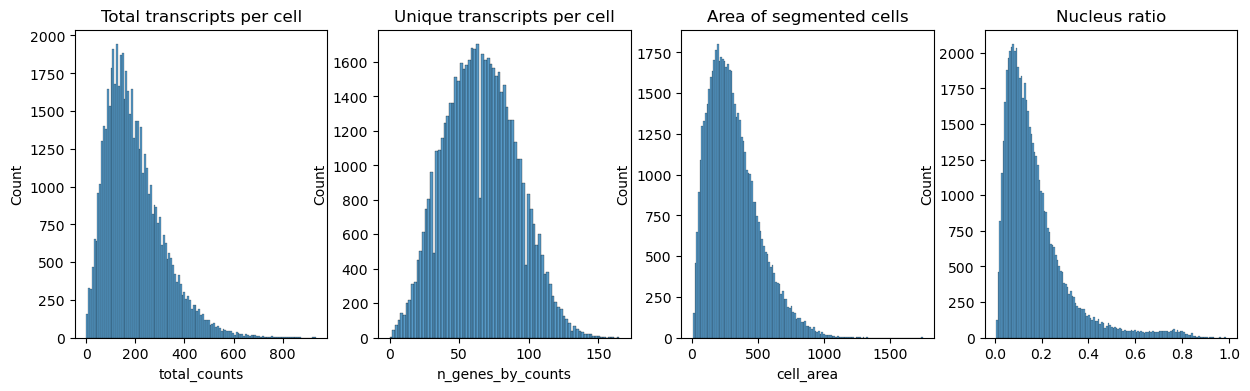

In [12]:
fig, axs = plt.subplots(1, 4, figsize=(15, 4))

axs[0].set_title("Total transcripts per cell")
sns.histplot(
    adata.obs["total_counts"],
    kde=False,
    ax=axs[0],
)

axs[1].set_title("Unique transcripts per cell")
sns.histplot(
    adata.obs["n_genes_by_counts"],
    kde=False,
    ax=axs[1],
)


axs[2].set_title("Area of segmented cells")
sns.histplot(
    adata.obs["cell_area"],
    kde=False,
    ax=axs[2],
)

axs[3].set_title("Nucleus ratio")
sns.histplot(
    adata.obs["nucleus_area"] / adata.obs["cell_area"],
    kde=False,
    ax=axs[3],
)

In [13]:
sc.pp.filter_cells(adata, min_counts=10)
sc.pp.filter_genes(adata, min_cells=5)

In [14]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


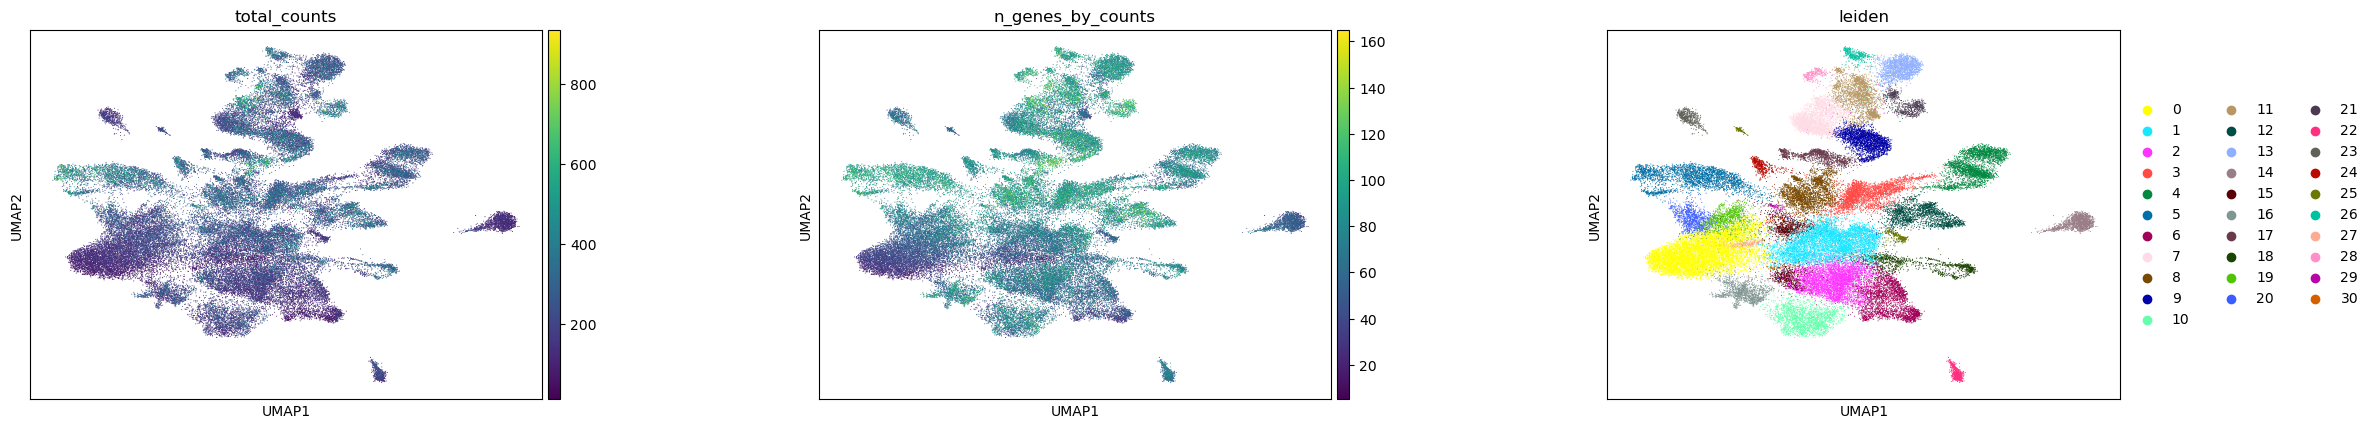

In [15]:
sc.pl.umap(
    adata,
    color=[
        "total_counts",
        "n_genes_by_counts",
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

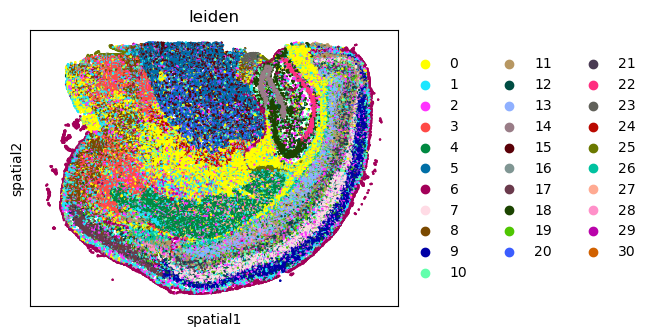

In [17]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "leiden",
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


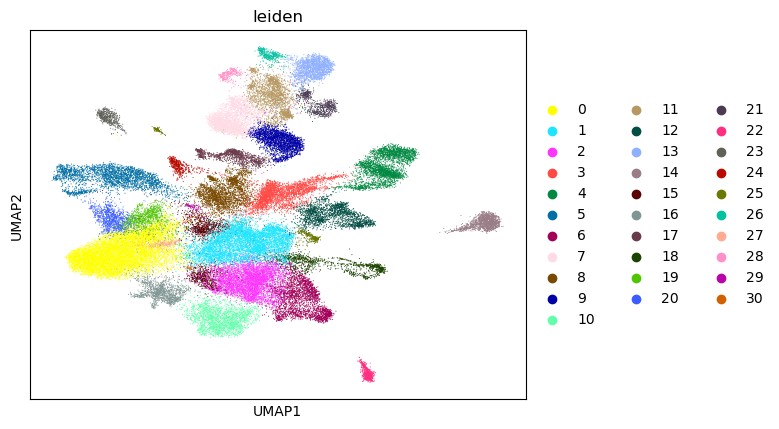

In [18]:
sc.pl.umap(
    adata,
    color=[
        "leiden"
    ],
    wspace=0.4,
)

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


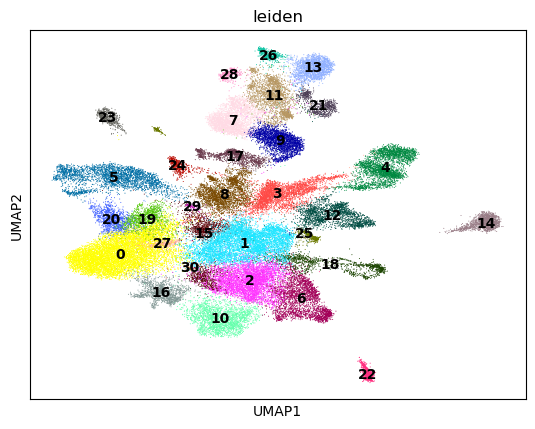

In [19]:
sc.pl.umap(
    adata,
    color=[
        "leiden"],
    legend_loc='on data',
    wspace=0.4,
)

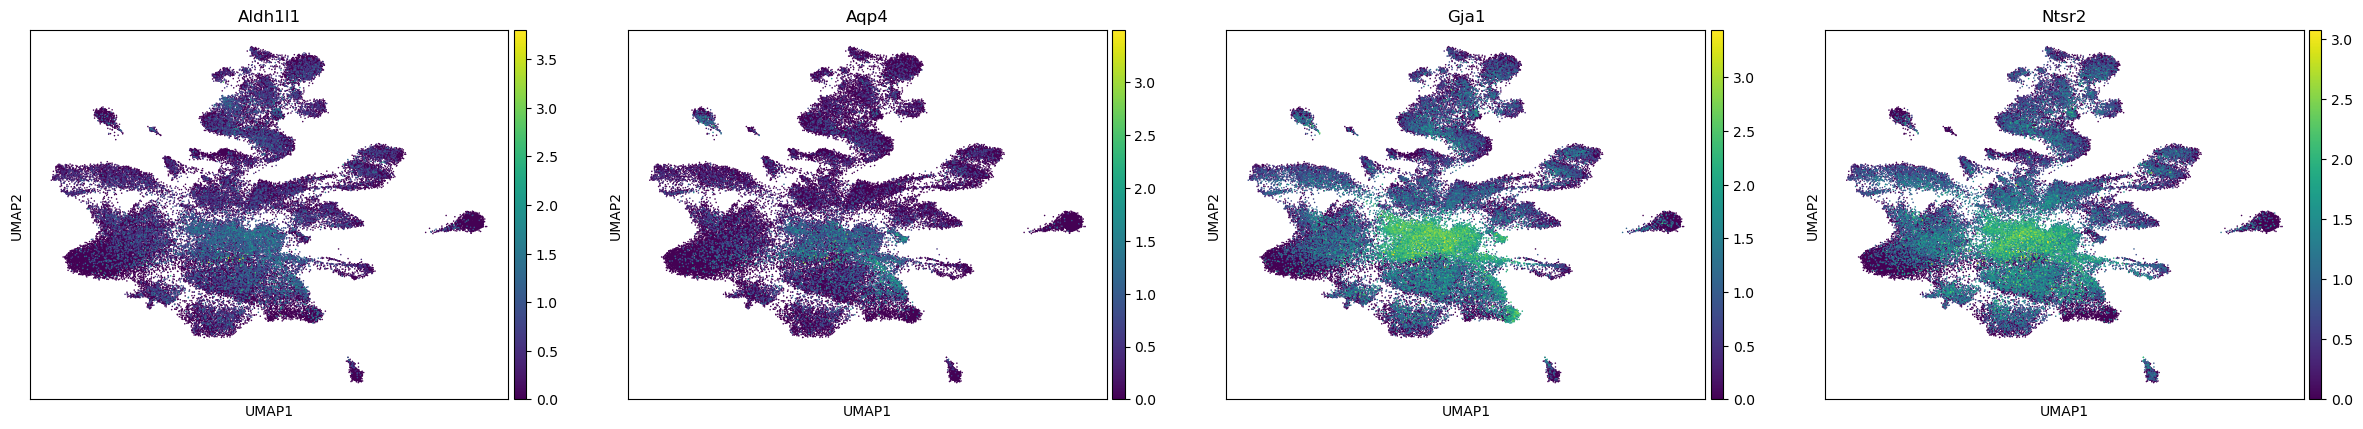

In [20]:
#Astrocytes
sc.pl.umap(adata,
           color=["Aldh1l1", "Aqp4", "Gja1", "Ntsr2"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

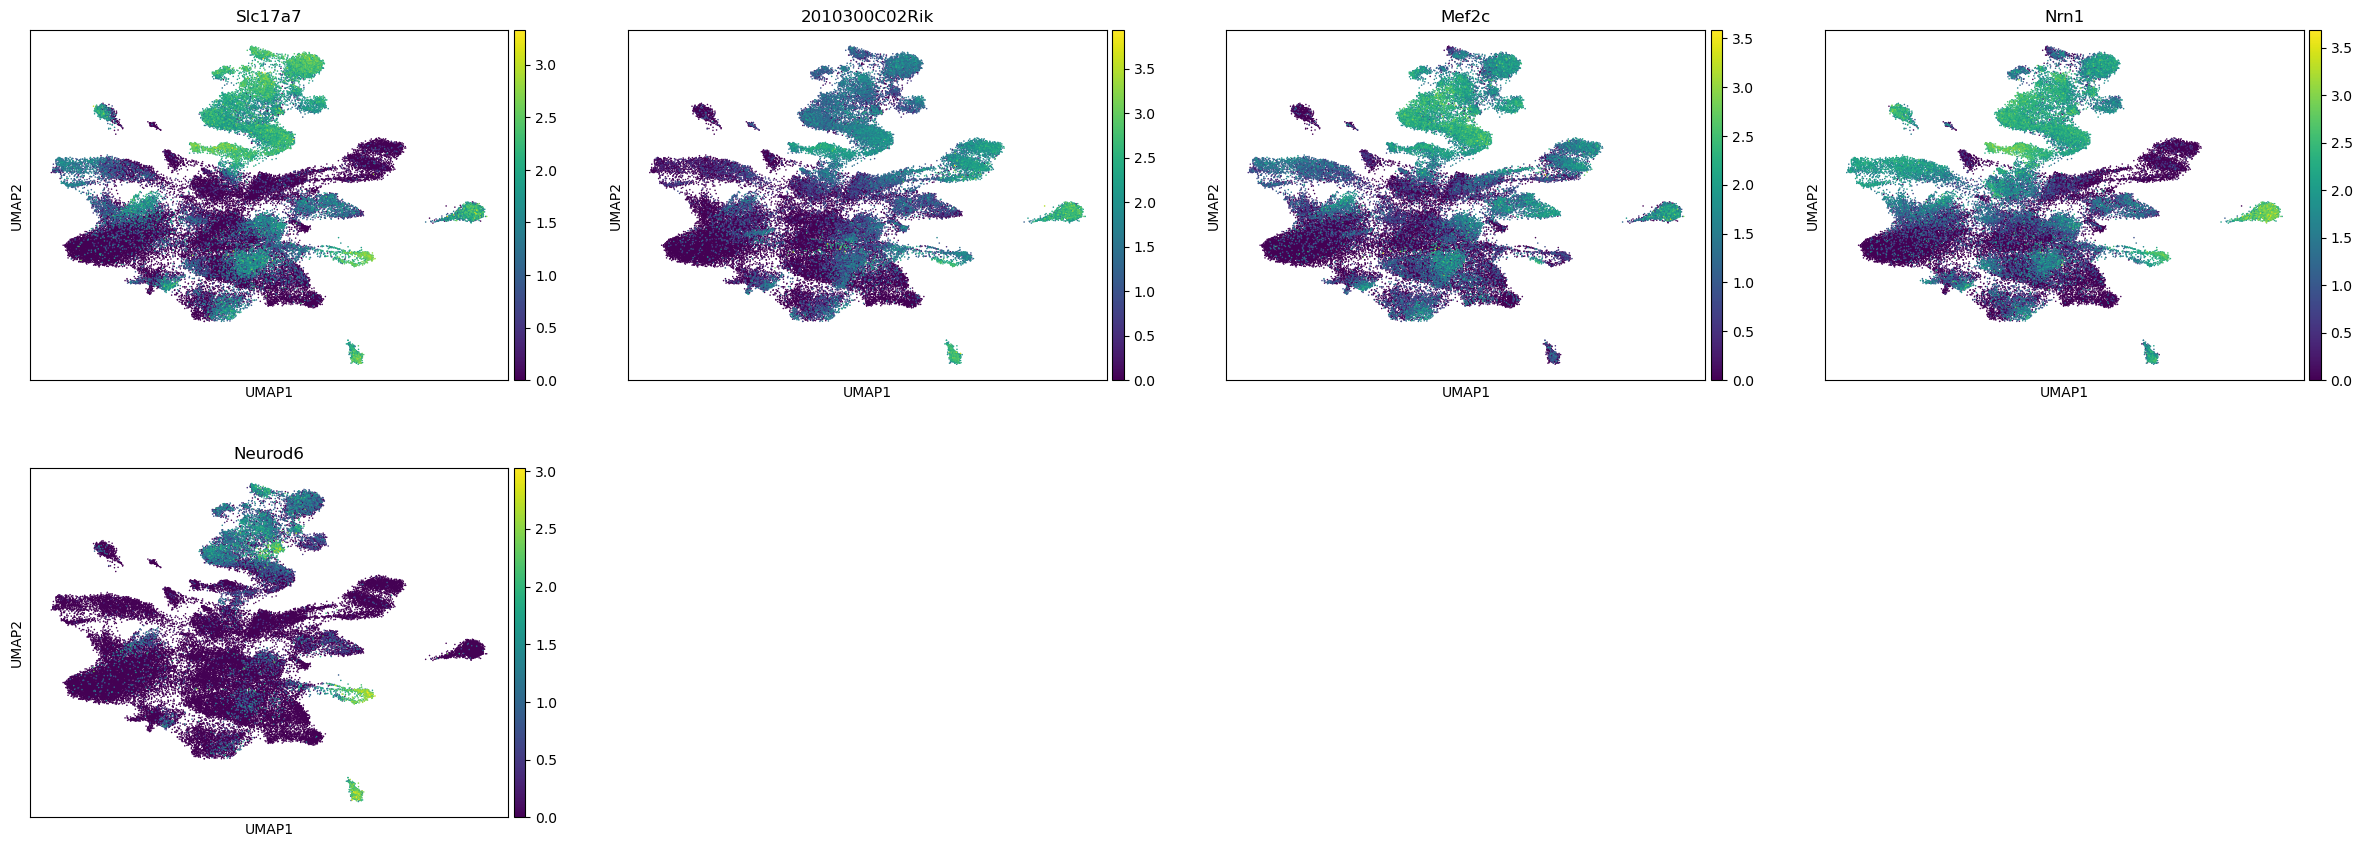

In [21]:
#Excitory Neurons
sc.pl.umap(adata,
           color=["Slc17a7", "2010300C02Rik", "Mef2c", "Nrn1", "Neurod6"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

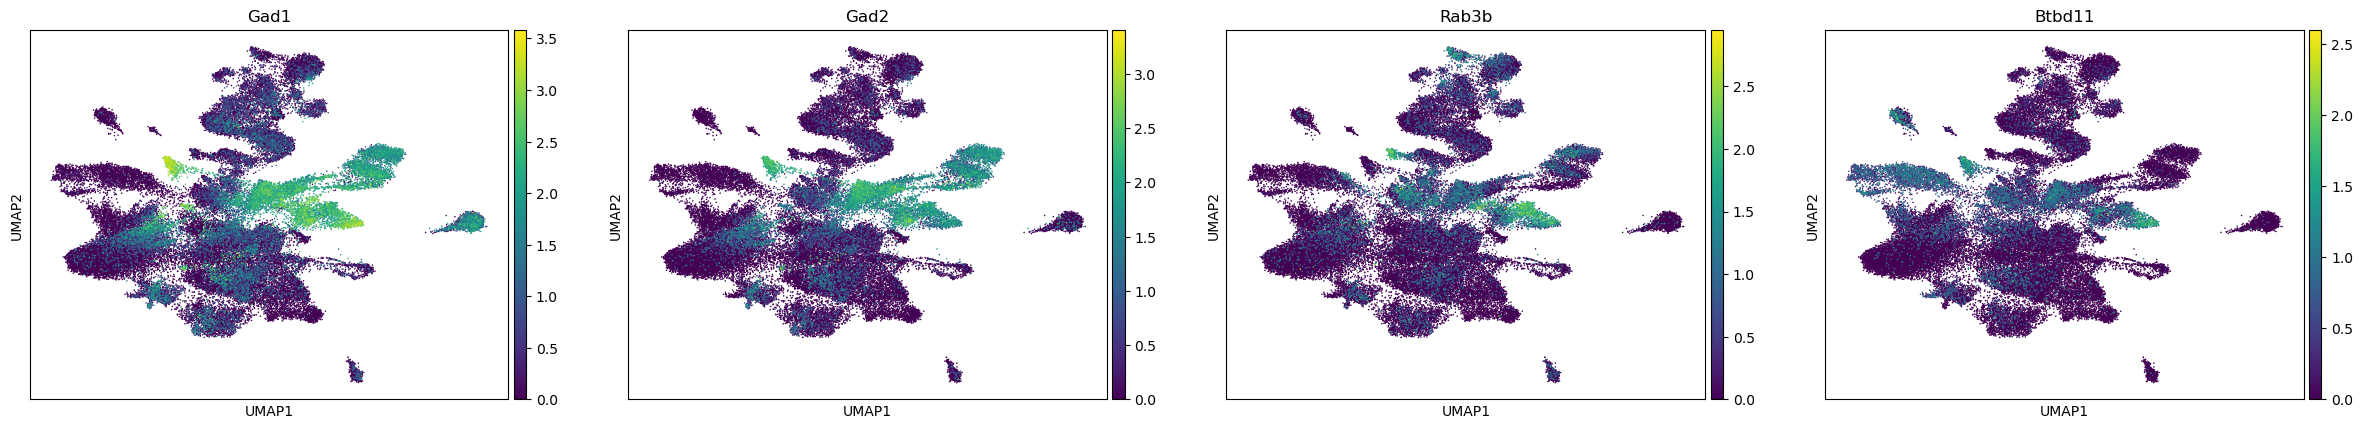

In [22]:
#Inhibitory Neurons
sc.pl.umap(adata,
           color=["Gad1", "Gad2", "Rab3b", "Btbd11"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

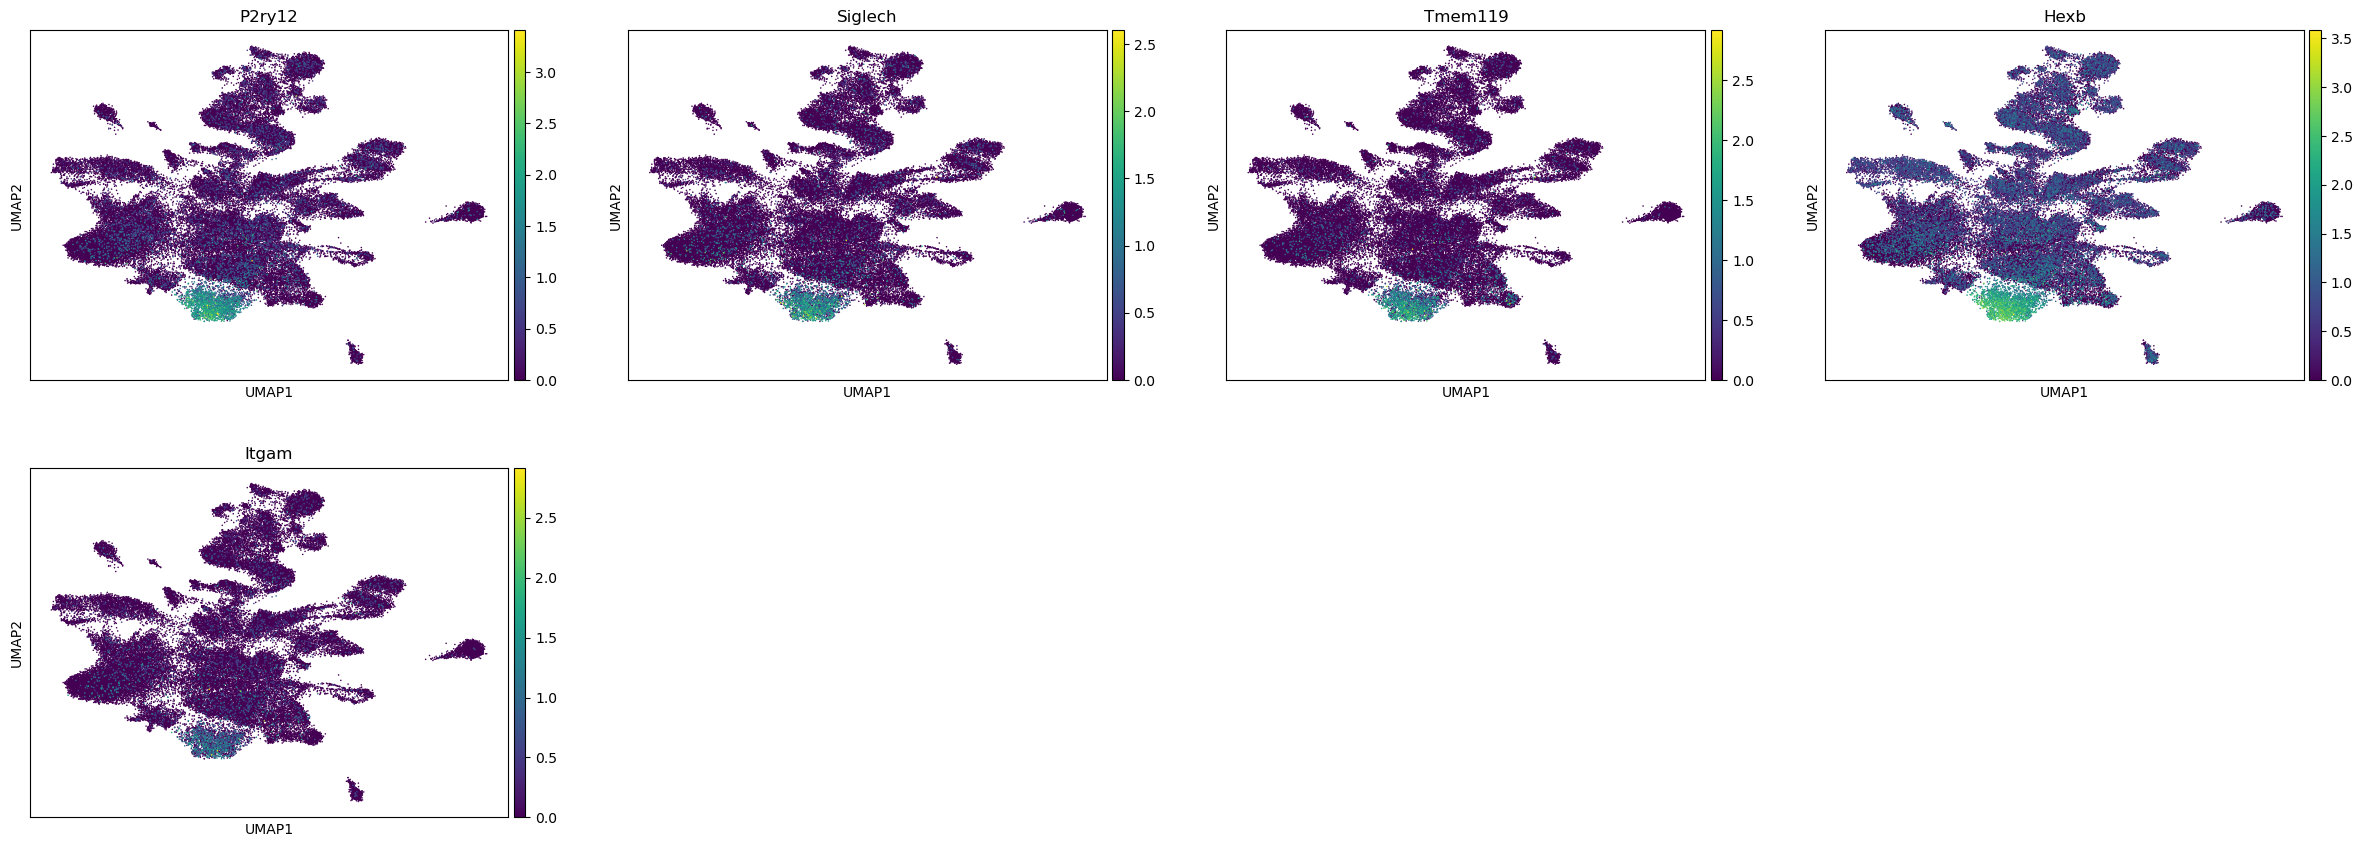

In [23]:
#Microglia
sc.pl.umap(adata,
           color=["P2ry12", "Siglech", "Tmem119", "Hexb", "Itgam"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

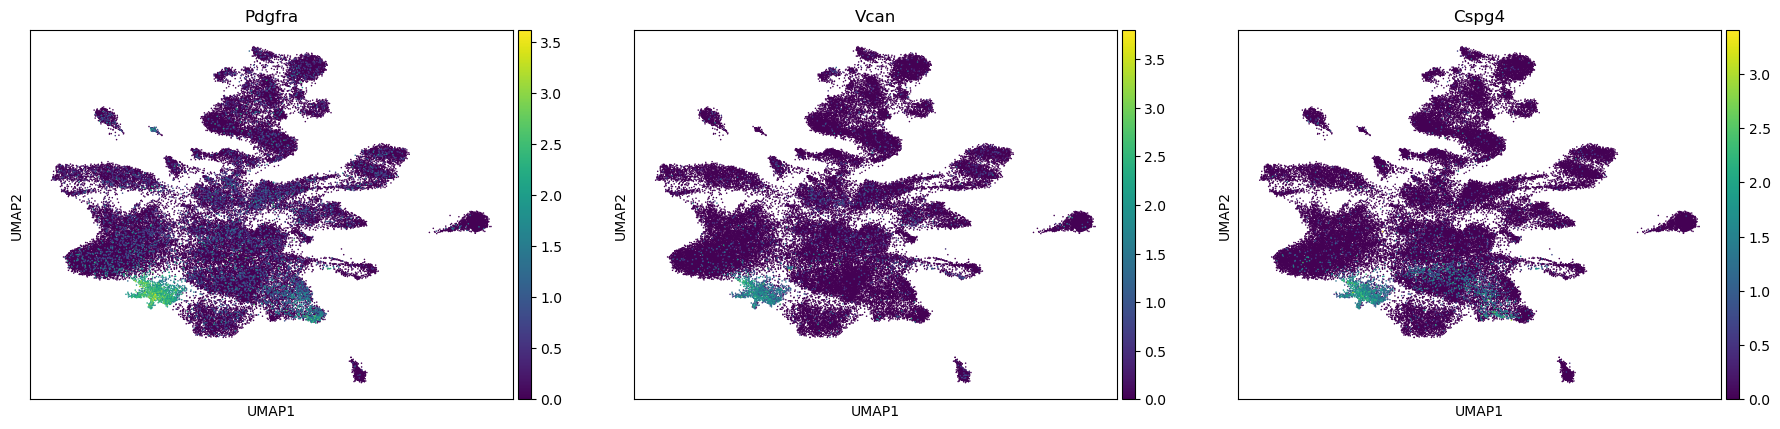

In [24]:
#OPC
sc.pl.umap(adata,
           color=["Pdgfra", "Vcan", "Cspg4"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

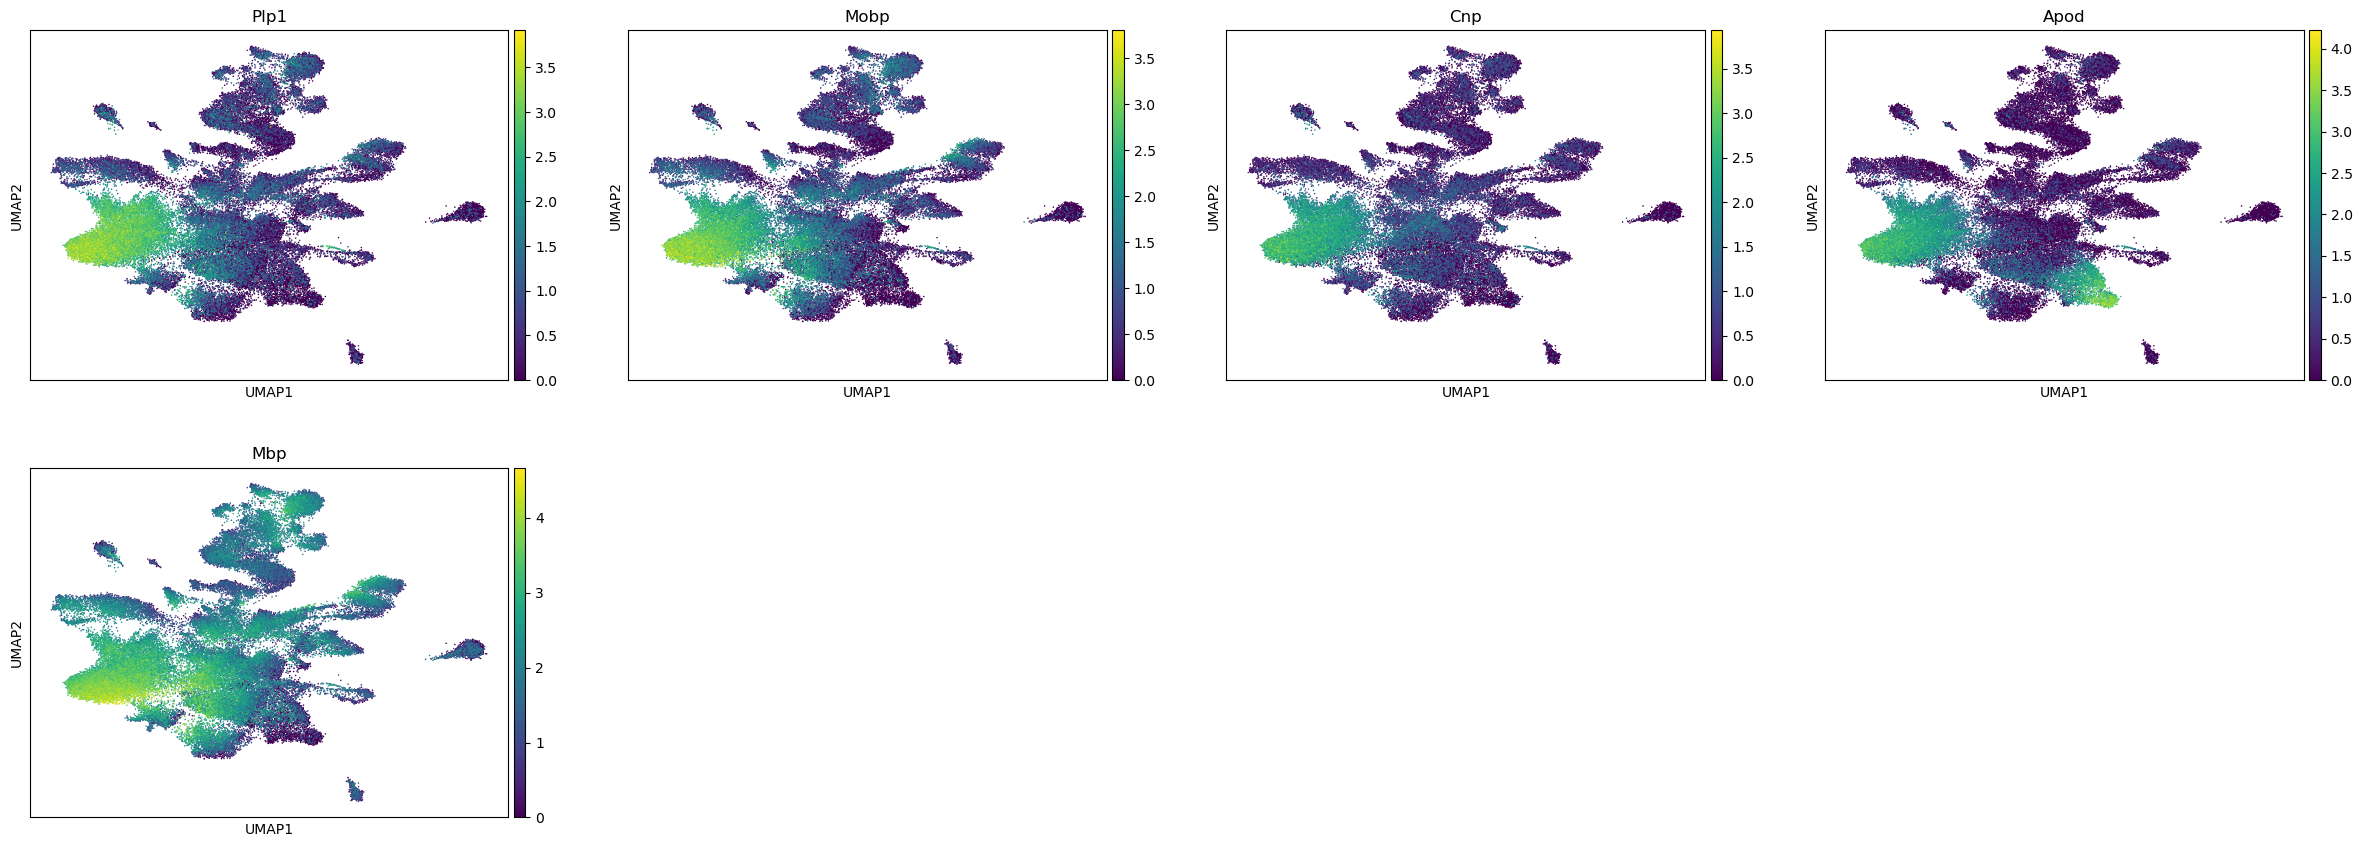

In [25]:
#Oligodendrocytes
sc.pl.umap(adata,
           color=["Plp1", "Mobp", "Cnp", "Apod", "Mbp"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

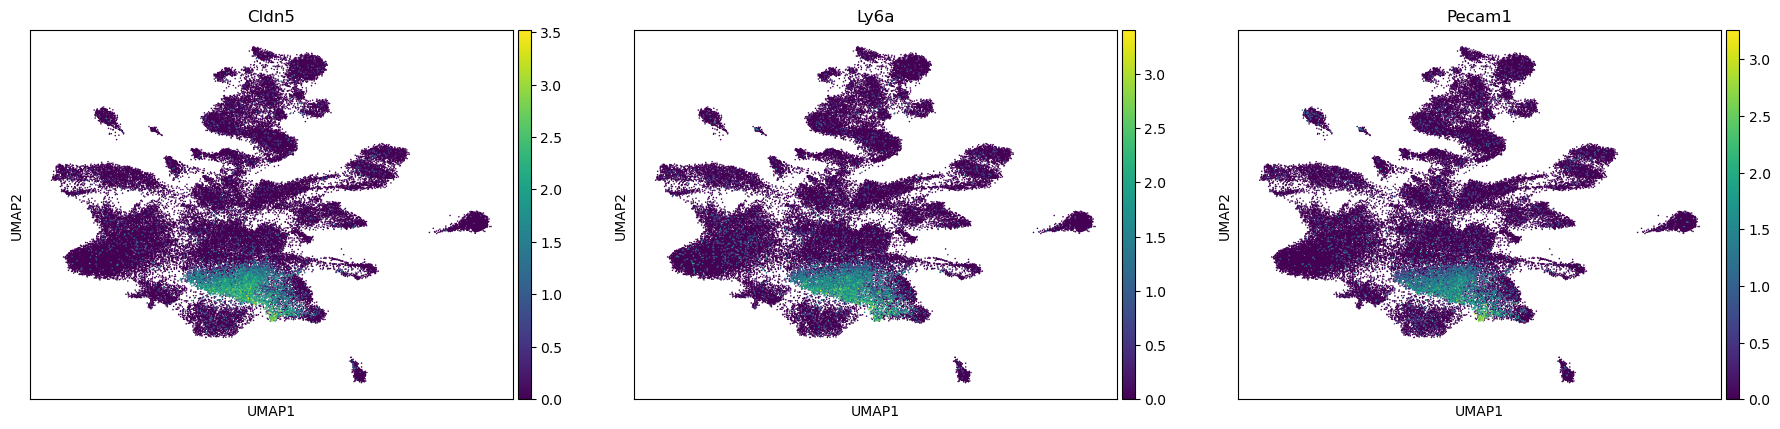

In [26]:
#Pericytes/Endothelial
sc.pl.umap(adata,
           color=["Cldn5", "Ly6a", "Pecam1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

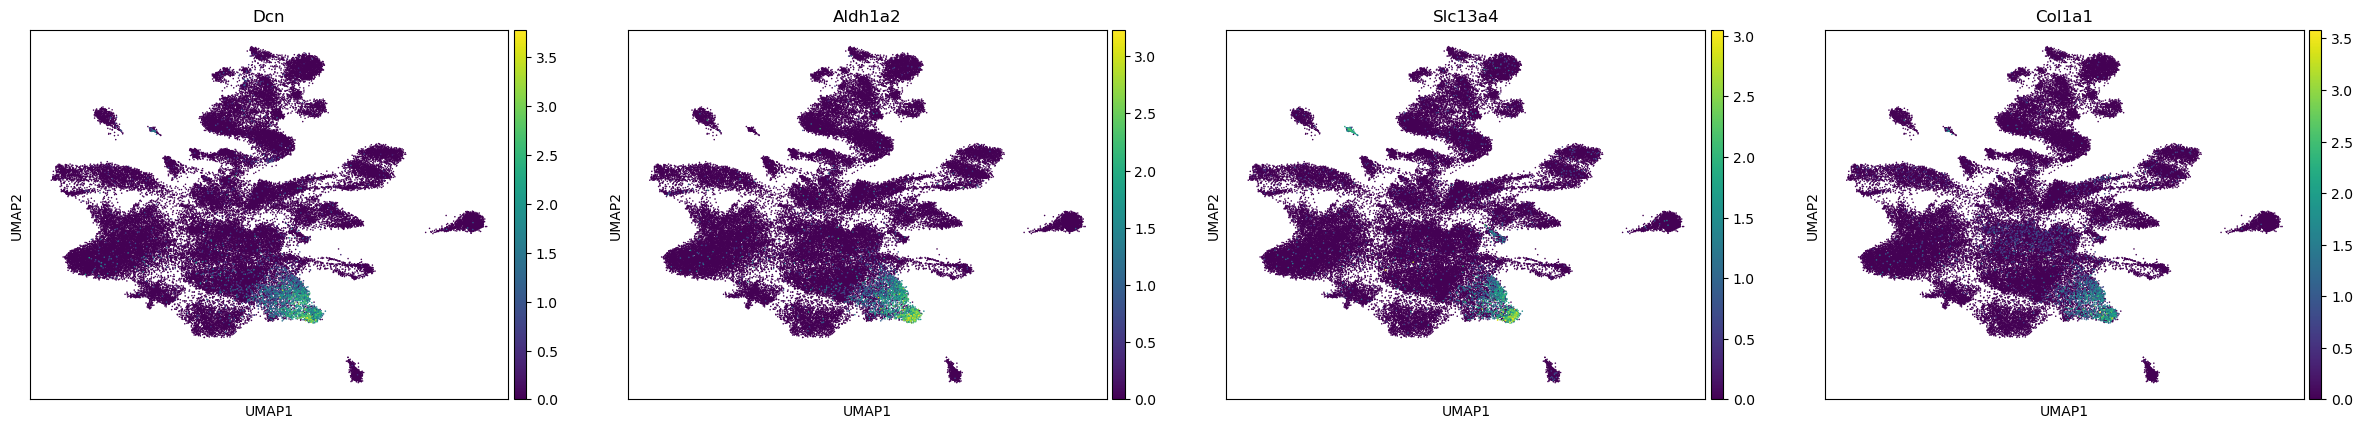

In [27]:
#Fibroblast
sc.pl.umap(adata,
           color=["Dcn", "Aldh1a2", "Slc13a4", "Col1a1"],
           legend_loc="on data",
           size=5,
           palette= "tab20")

In [28]:
labels= {"0":"Oligodendrocytes",
'1':"Astrocytes",
'2':"Pericytes/Endothelial",
'3':"Inhibitory Neurons",
'4':"-",
'5':"-",
'6':"Fibroblast",
'7':"Excitory Neurons",
'8':"-",
'9':"Excitory Neurons",
'10':"Microglia",
'11':"Excitory Neurons",
'12':"Inhibitory Neurons",
'13':"Excitory Neurons",
'14':"Excitory Neurons",
'15':"Astrocytes",
'16':"OPC",
'17':"Excitory Neurons",
'18':"Excitory Neurons",
'19':"Oligodendrocytes",
'20':"Oligodendrocytes",
'21':"Excitory Neurons",
'22':"Excitory Neurons",
'23':"Excitory Neurons",
'24':"Inhibitory Neurons",
'25':"Astrocytes",
'26':"Excitory Neurons",
'27':"Oligodendrocytes",
'28':"Excitory Neurons",
'29':"Inhibitory Neurons",
'30':"Pericytes/Endothelial"}

In [29]:
# Assign cell type labels to single cells in adata
adata.obs["cell_type"] = adata.obs["leiden"].map(labels)

In [30]:
adata.obs["cell_type"]

aaabaohn-1               Astrocytes
aaabocno-1       Inhibitory Neurons
aaadpgin-1               Astrocytes
aaaecjii-1       Inhibitory Neurons
aaaegkaj-1         Oligodendrocytes
                      ...          
oijlpmjb-1    Pericytes/Endothelial
oijmjakb-1               Fibroblast
oikbcigb-1               Astrocytes
oikbfpkg-1               Fibroblast
oikcmgab-1               Fibroblast
Name: cell_type, Length: 58447, dtype: object

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


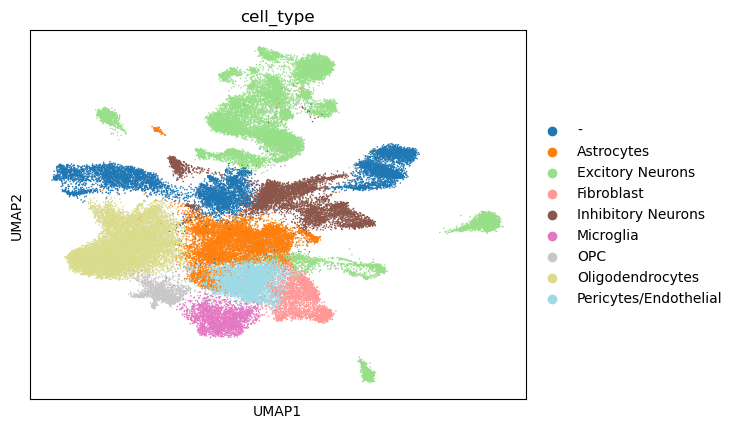

In [31]:
sc.pl.umap(adata,
           color=['cell_type'],
           size=5,
           palette= "tab20")

C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:747: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if c is not None and c in adata.obs and is_categorical_dtype(adata.obs[c]):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:471: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if not is_categorical_dtype(color_source_vector):
C:\Users\Acer\anaconda3\envs\fel_conda\Lib\site-packages\squidpy\pl\_spatial_utils.py:483: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_map)
C:\Users\Acer\anaconda3\envs\f

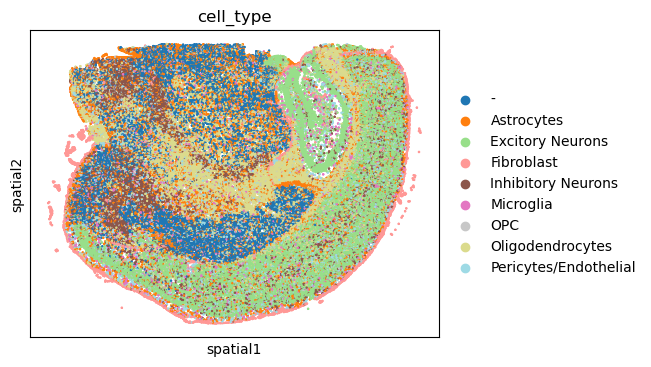

In [32]:
sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["cell_type"],
    wspace=0.4,
)

In [33]:
adata

AnnData object with n_obs × n_vars = 58447 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors', 'cell_type_colors'
    obsm: 'spatial', 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [34]:
adata.write("Xenium_TG_57.h5ad")

In [35]:
adata= sc.read_h5ad("Xenium_TG_57.h5ad")

In [36]:
adata

AnnData object with n_obs × n_vars = 58447 × 347
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'cell_type'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'cell_type_colors', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'